In [8]:
from data_process import get_MNIST_dataloader
train_loader,_ =get_MNIST_dataloader()

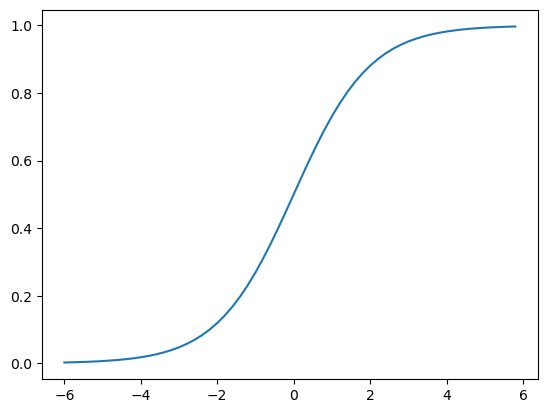

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1./(1+np.exp(-x))

x = np.arange(-6,6,0.2)
y = sigmoid(x)
plt.plot(x,y)

In [10]:
import paddle
import paddle.nn.functional as F
from paddle.nn import Linear

class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        self.fc1 = Linear(in_features=784, out_features=10)
        self.fc2 = Linear(in_features=10, out_features=10)  
        self.fc3 = Linear(in_features=10, out_features=1)
        
    def forward(self,inputs):
        inputs = paddle.reshape(inputs,[inputs.shape[0],784])
        output1 = self.fc1(inputs)
        output1 = F.sigmoid(output1)
        outputs2 = self.fc2(output1)
        outputs2 = F.sigmoid(outputs2)
        outputs_final = self.fc3(outputs2)
        return outputs_final
        

In [4]:
model = MNIST()
parmams_info = paddle.summary(model,(1,1,28,28))
print(parmams_info)

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-1          [[1, 784]]            [1, 10]             7,850     
   Linear-2          [[1, 10]]             [1, 10]              110      
   Linear-3          [[1, 10]]              [1, 1]              11       
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
---------------------------------------------------------------------------

{'total_params': 7971, 'trainable_params': 7971}


In [11]:
def train(model):  
    model.train()  
  
    opt = paddle.optimizer.SGD(learning_rate=0.01, parameters=model.parameters())  
  
    EPOCH_NUM = 10  
    loss_list = []  
      
    for epoch_id in range(EPOCH_NUM):  
        for batch_id, data in enumerate(train_loader()):  
            images, labels = data  
            images = paddle.to_tensor(images)  
            labels = paddle.to_tensor(labels, dtype='float32')  
              
            predicts = model(images)  
              
            loss = F.square_error_cost(predicts, labels)  
            avg_loss = paddle.mean(loss)  
              
            if batch_id % 100 == 0:  
                loss_value = avg_loss.numpy()  
                loss_list.append(loss_value)  
                print("epoch: {}, batch_id: {}, loss is: {}".format(epoch_id, batch_id, loss_value))  
              
            avg_loss.backward()  
            opt.step()  
            opt.clear_grad()  
                  
    paddle.save(model.state_dict(), 'mnist.pdparams')  
    return loss_list
model = MNIST()
loss_list = train(model)


epoch: 0, batch_id: 0, loss is: 34.954833984375
epoch: 0, batch_id: 100, loss is: 6.40114688873291
epoch: 0, batch_id: 200, loss is: 4.68400764465332
epoch: 0, batch_id: 300, loss is: 3.5723588466644287
epoch: 0, batch_id: 400, loss is: 3.6836743354797363
epoch: 0, batch_id: 500, loss is: 2.6925981044769287
epoch: 0, batch_id: 600, loss is: 2.893784284591675
epoch: 0, batch_id: 700, loss is: 2.154475212097168
epoch: 0, batch_id: 800, loss is: 2.2024924755096436
epoch: 0, batch_id: 900, loss is: 2.828141689300537
epoch: 1, batch_id: 0, loss is: 2.3409783840179443
epoch: 1, batch_id: 100, loss is: 2.8784754276275635
epoch: 1, batch_id: 200, loss is: 2.9948577880859375
epoch: 1, batch_id: 300, loss is: 3.1053104400634766
epoch: 1, batch_id: 400, loss is: 1.6923235654830933
epoch: 1, batch_id: 500, loss is: 1.7690355777740479
epoch: 1, batch_id: 600, loss is: 2.290196418762207
epoch: 1, batch_id: 700, loss is: 1.95451819896698
epoch: 1, batch_id: 800, loss is: 3.358388900756836
epoch: 1, b

In [ ]:
plt.plot(loss_list)

# 卷积

In [ ]:
import paddle 
from paddle.nn import Conv2D,MaxPool2D,Linear
from paddle.nn import Linear
import paddle.nn.functional as F
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        self.conv1 = Conv2D(in_channels=1,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool1 = MaxPool2D(kernel_size=2,stride=2)
        self.conv2 = Conv2D(in_channels=20,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool2 = MaxPool2D(kernel_size=2,stride=2)
        self.fc = Linear(in_features=980,out_features=1)
    def forward(self,inputs):
        x = self.conv1(inputs)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.reshape(x,[x.shape[0],-1])
        x = self.fc(x)
        return x

In [ ]:
import  torch 
print(torch.cuda.get_device_name(0))



In [ ]:
import torch
torch.cuda.is_available()
